# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment

import numpy as np
import random
import time
import torch
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.10000000149011612
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### 4.1 Training

In [6]:
from maddpg_agent import MAgent

In [7]:
# DDPG

def maddpg(n_episodes=4000, print_every=100):
    """Deep Deterministic Policy Gradient (DDPG)
    
    Params
    ======
        n_episodes  (int)   : maximum number of training episodes
        max_t       (int)   : maximum number of timesteps per episode
        print_every (int)   : interval to display results

    """
    means_scores = []                              # list of means of moving
    scores_window = deque(maxlen=100)              # mean scores from most recent 100 episodes
    total_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]       # reset environment
        states = env_info.vector_observations                   # get the current state (for each agent)      
        scores = np.zeros(num_agents)                           # initialize the score (for each agent)
        
        magent.reset()
        
        start = time.time()
        
        while True:
            actions = magent.act(states)         # select an action (for each agent)
            env_info = env.step(actions)[brain_name]            # send all actions to tne environment
            next_states = env_info.vector_observations          # get next state (for each agent)
            rewards = env_info.rewards                          # get reward (for each agent)
            dones = env_info.local_done                         # see if episode finished
            
            # save experience to replay buffer, perform learning step at defined interval
            magent.step(states, actions, rewards, next_states, dones)  
            
            states = next_states                                # roll over states to next time step
            scores += rewards                                   # update the score (for each agent)
            
            if np.any(dones):                                   # exit loop if episode finished
                break
                
        end = time.time()
        duration = end - start
        
        max_score= np.max(scores)          # save mean score for the episode
        total_scores.append(max_score)
        scores_window.append(max_score)             # save mean score to window
        means_scores.append(np.mean(scores_window))    # save moving average
                
        if i_episode % print_every == 0:
            print('\rEpisode {} ({}s)\tMax: {:.4f}\tMean of scores: {:.4f}'.format(\
                  i_episode, round(duration), max_score, means_scores[-1]))
                  
        if means_scores[-1] >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, means_scores[-1]))            
            torch.save(magent.ddpg_agents[0].actor_local.state_dict(), 'checkpoint_actor_26.pth')
            torch.save(magent.ddpg_agents[0].critic_local.state_dict(), 'checkpoint_critic_26.pth')
            break
            
    return total_scores, means_scores

In [8]:
# training loop
start = time.time()
magent = MAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=2, shared_replay_buffer=True)
total_scores, means_scores = maddpg()
end = time.time()

ma shared_memory ->  <ddpg_agent.ReplayBuffer object at 0x000002105A42C4E0>
ddpg Agent ->  <ddpg_agent.ReplayBuffer object at 0x000002105A42C4E0>
ddpg Agent ->  <ddpg_agent.ReplayBuffer object at 0x000002105A42C4E0>
Episode 100 (0s)	Max: 0.0000	Mean of scores: 0.0010
Episode 200 (0s)	Max: 0.0000	Mean of scores: 0.0118
Episode 300 (0s)	Max: 0.0000	Mean of scores: 0.0117
Episode 400 (0s)	Max: 0.0000	Mean of scores: 0.0437
Episode 500 (5s)	Max: 0.5000	Mean of scores: 0.2785

Environment solved in 533 episodes!	Average Score: 0.50


In [9]:
elapsed = (end - start) / 60.0 # in minutes
print("\nElapsed Time: {0:3.2f} mins.".format(elapsed))


Elapsed Time: 12.40 mins.


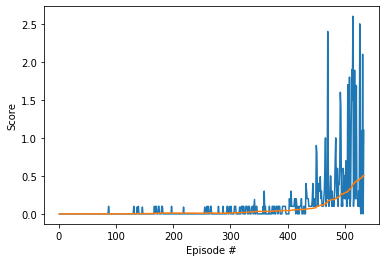

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(total_scores)+1), total_scores)
plt.plot(np.arange(1, len(total_scores)+1), means_scores)

plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('./images/training.png')
plt.show()

### 4.2 Test

In [11]:
from model import Actor

array_scores = []

agent = MAgent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0, shared_replay_buffer=True)

agent.ddpg_agents[0].actor_local = Actor(state_size, action_size, 0).to('cuda')
agent.ddpg_agents[0].actor_local.load_state_dict(torch.load('checkpoint_actor_26.pth'))
agent.ddpg_agents[1].actor_local = Actor(state_size, action_size, 0).to('cuda')
agent.ddpg_agents[1].actor_local.load_state_dict(torch.load('checkpoint_actor_26.pth'))


for i in range(1, 11):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states) 
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        
        if np.any(dones):                                  # exit loop if episode finished
            break
            
    array_scores.append(scores)  
    
    print('\rTest -> Episode {} : Max Score :{:.2f}'.format(i , np.max(scores)))

ma shared_memory ->  <ddpg_agent.ReplayBuffer object at 0x000002106A7E0C18>
ddpg Agent ->  <ddpg_agent.ReplayBuffer object at 0x000002106A7E0C18>
ddpg Agent ->  <ddpg_agent.ReplayBuffer object at 0x000002106A7E0C18>
Test -> Episode 1 : Max Score :0.00
Test -> Episode 2 : Max Score :0.10
Test -> Episode 3 : Max Score :0.10
Test -> Episode 4 : Max Score :0.09
Test -> Episode 5 : Max Score :0.10
Test -> Episode 6 : Max Score :0.20
Test -> Episode 7 : Max Score :0.10
Test -> Episode 8 : Max Score :0.10
Test -> Episode 9 : Max Score :0.00
Test -> Episode 10 : Max Score :0.09


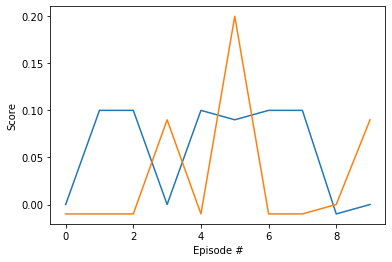

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(array_scores)), array_scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig('./images/testing_score.png')

plt.show()

When finished, you can close the environment.

In [13]:
env.close()

```
UPDATE_EVERY = 2        
BUFFER_SIZE = int(2e5)  # replay buffer size
BATCH_SIZE = 512        # minibatch size
GAMMA = 0.99            # discount factor
TAU = 0.3              # for soft update of target parameters
LR_ACTOR = 5e-4         # learning rate of the actor 
LR_CRITIC = 5e-4        # learning rate of the critic
WEIGHT_DECAY = 0        # L2 weight decay
LEARN_EVERY = 20        # learning timestep interval
LEARN_NUM = 10          # number of learning passes
OU_SIGMA = 0.2          # Ornstein-Uhlenbeck noise parameter
OU_THETA = 0.15         # Ornstein-Uhlenbeck noise parameter
EPSILON = 1.0           # explore->exploit noise process added to act step
EPSILON_DECAY = 1e-6    # decay rate for noise process
GRAD_CLIPPING = 1.0     # Gradient Clipping

```